In [1]:
import datetime as dt
import pandas as pd
import os
from wordcloud import WordCloud,STOPWORDS

In [2]:
cwd=os.getcwd()
df=pd.read_csv(cwd+'/cleaned-BA-reviews.csv')

In [3]:
df=df.reset_index(drop=True)

AVERAGE RATING for BA 

In [4]:
df.stars.mean()

4.620988099531194

What is the total counts for each ratings?

Text(0.5, 0.98, 'total count for each rating')

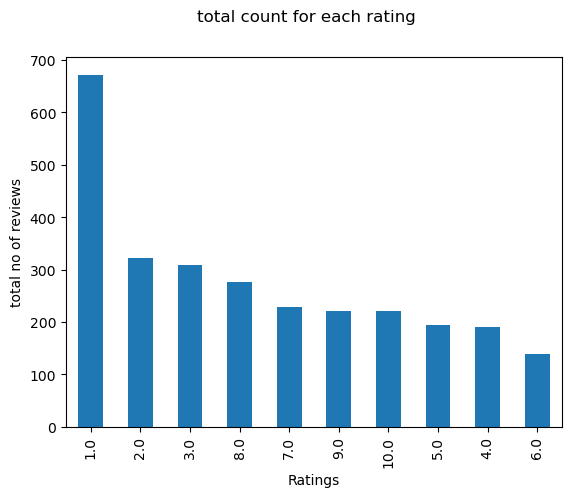

In [5]:
import matplotlib.pyplot as plt
df.stars.value_counts().plot(kind='bar')
plt.xlabel("Ratings")
plt.ylabel("total no of reviews")
plt.suptitle("total count for each rating")

In [6]:
df_ratings=pd.DataFrame(df.stars.value_counts())
df_ratings=df_ratings.reset_index()
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [7]:
df_ratings

stars  count  pct_values
0    1.0    672        1.82
1    2.0    322        3.64
2    3.0    308        5.45
3    8.0    277       14.55
4    7.0    228       12.73
5    9.0    221       16.36
6   10.0    220       18.18
7    5.0    195        9.09
8    4.0    191        7.27
9    6.0    139       10.91

In [8]:
df_ratings=df_ratings.rename(columns={'count':'total_counts'})
df_ratings

stars  total_counts  pct_values
0    1.0           672        1.82
1    2.0           322        3.64
2    3.0           308        5.45
3    8.0           277       14.55
4    7.0           228       12.73
5    9.0           221       16.36
6   10.0           220       18.18
7    5.0           195        9.09
8    4.0           191        7.27
9    6.0           139       10.91

In [9]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]

In [10]:
clrs

['Red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

Text(0.5, 1.0, 'Counts for each ratings')

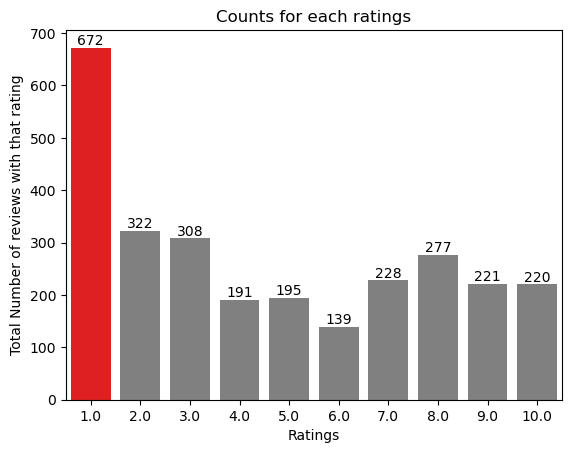

In [11]:
import seaborn as sns
ax=sns.barplot(x=df_ratings.stars,y=df_ratings.total_counts,data=df_ratings,errwidth=0,palette=clrs)
ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

All the unique countries

In [12]:
print(f"{len(df.country.unique())} unique countries")

65 unique countries


In [13]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [14]:
df_country_review.rename(columns={'total_reviews':'country'}, inplace=True)
df_country_review

country  count
0  United Kingdom   1734
1   United States    316
2       Australia    113
3          Canada     88
4         Germany     45

<Axes: xlabel='country'>

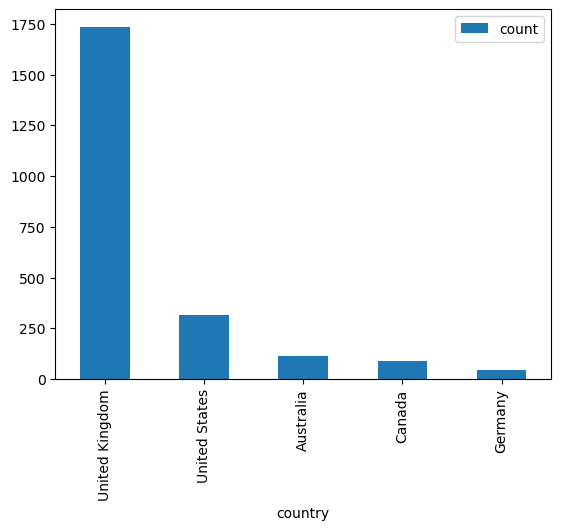

In [15]:
df_country_review.plot(kind='bar',x='country')

Which country provided on average highest ratings?

In [16]:
df_country_rating = pd.DataFrame(df.groupby('country').stars.mean().sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'},inplace=True)
df_country_rating

country  avg_rating
0               Jordan   10.000000
1              Ecuador   10.000000
2            Indonesia   10.000000
3               Israel    7.500000
4              Hungary    7.500000
..                 ...         ...
60             Iceland    1.666667
61              Taiwan    1.500000
62             Bermuda    1.000000
63  Russian Federation    1.000000
64      Cayman Islands    1.000000

[65 rows x 2 columns]

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

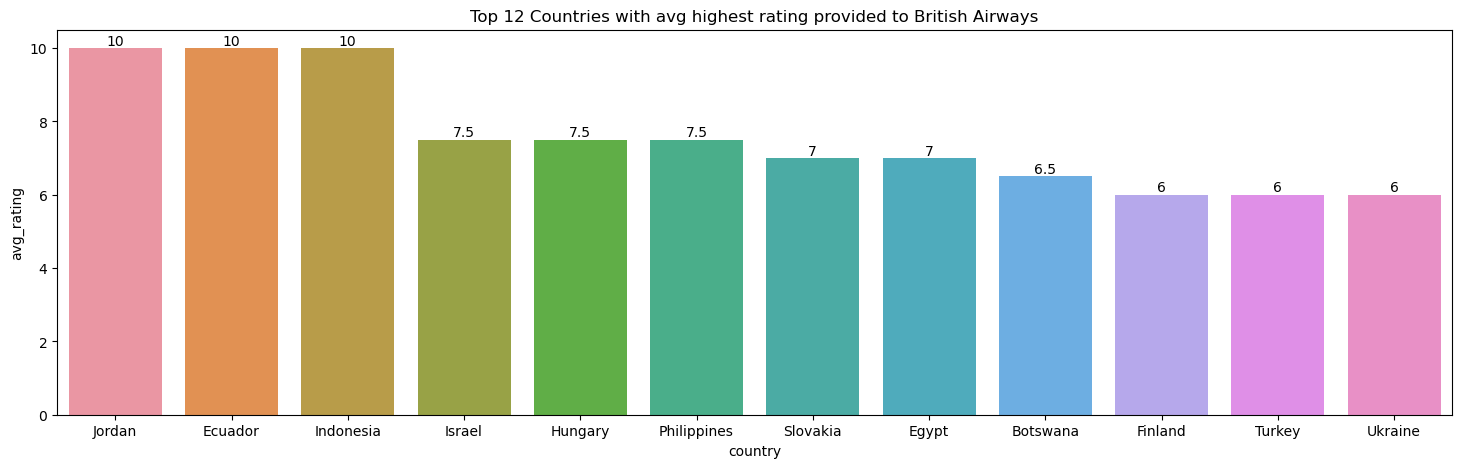

In [17]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

Time Series Analysis

In [18]:
df.date=pd.to_datetime(df.date)
df.date

0      2024-02-06
1      2024-02-05
2      2024-01-30
3      2024-01-29
4      2024-01-28
          ...    
2768   2014-09-06
2769   2014-09-06
2770   2014-09-06
2771   2014-09-06
2772   2014-09-06
Name: date, Length: 2773, dtype: datetime64[ns]

In [19]:
import plotly.express as px

In [20]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [21]:
reviews=" ".join(df.corpus)

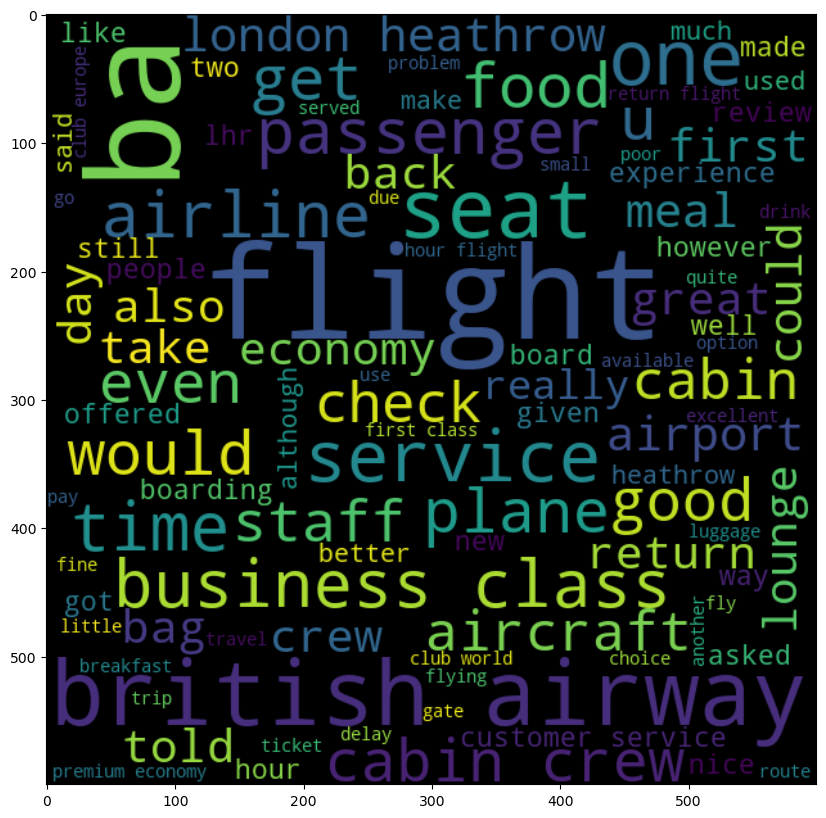

In [22]:
from nltk.corpus import stopwords
plt.figure(figsize=(20,10))
stopwords=set(stopwords.words('english'))
wordcloud=WordCloud(height=600,width=600,max_font_size=100,max_words=100,stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

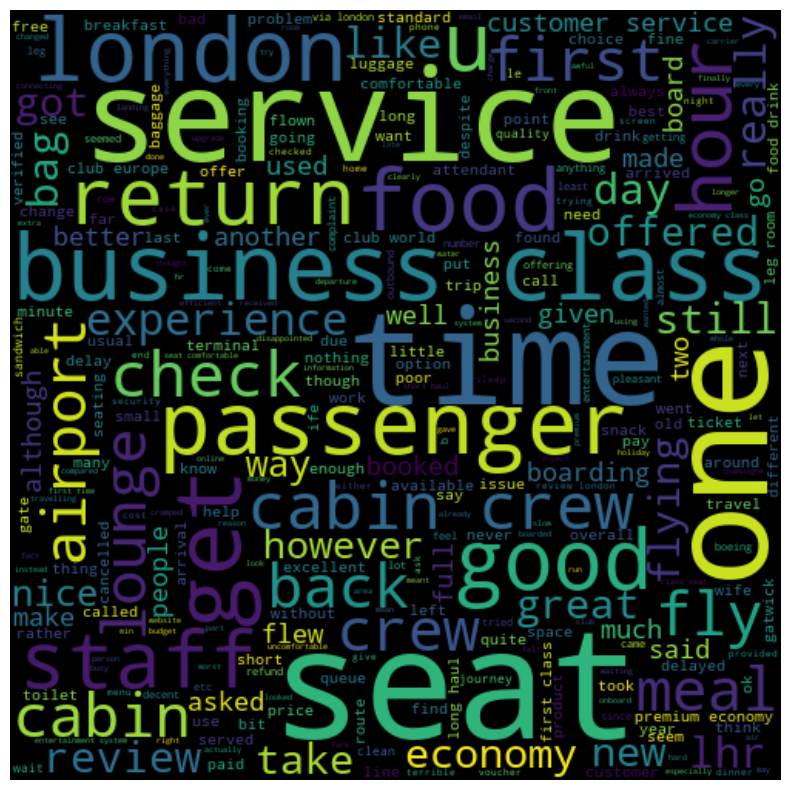

In [23]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WORD FREQUENCY 

In [24]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
words=reviews.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])
new_words = [word for word in words if word not in stopwords]


In [26]:
nlp_words=FreqDist(new_words).most_common(20)
all_fdist=pd.Series(dict(nlp_words))
all_fdist

seat          3333
service       2245
time          1858
food          1756
crew          1622
good          1547
cabin         1497
class         1457
hour          1430
business      1197
staff         1156
economy       1090
check          997
drink          907
meal           888
lounge         844
club           834
return         825
customer       762
experience     731
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'club'),
  Text(17, 0, 'return'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'experience')])

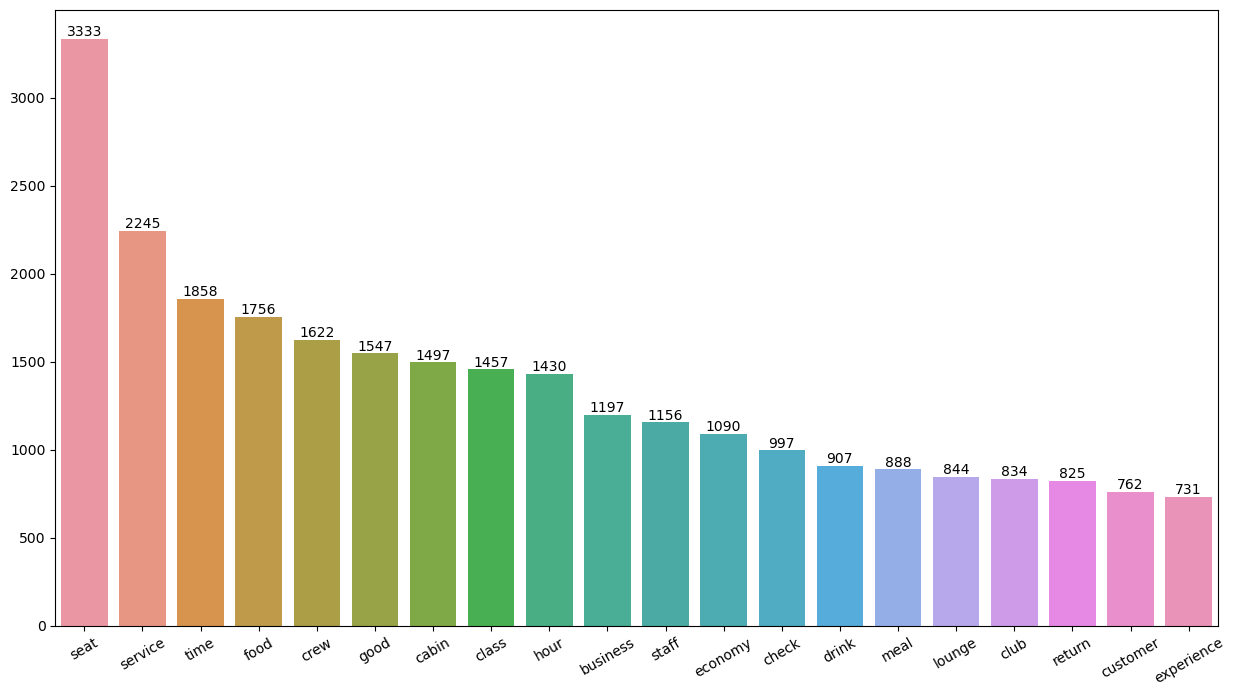

In [27]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience.

Word frequency with N-gram

In [28]:
import nltk.collocations as collocations
from nltk import FreqDist,bigrams

In [29]:
reviews=" ".join(df.corpus)

In [30]:
words=reviews.split(" ")

<Axes: >

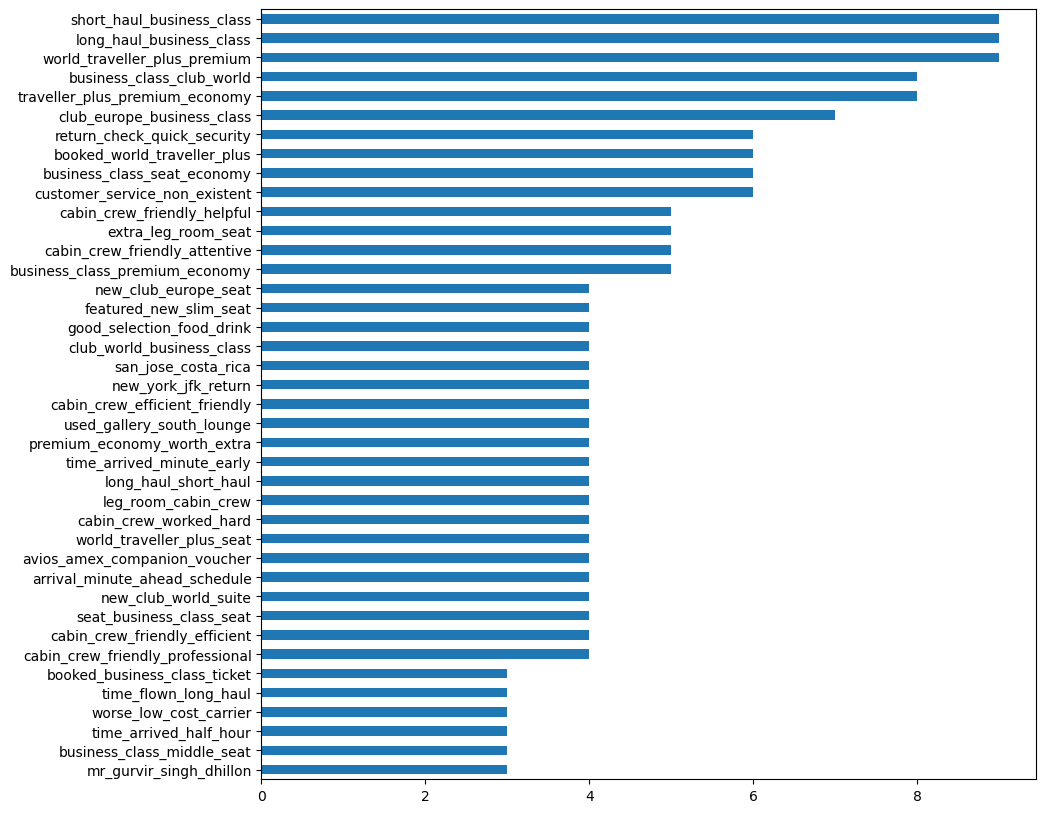

In [31]:
new_words=[word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [32]:
ratings_1_3=df[df.stars.isin([1,2,3])]
ratings_4_6=df[df.stars.isin([4,5,6])]
ratings_7_10=df[df.stars.isin([7,8,9,10])]

reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)


In [33]:
#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


<Axes: >

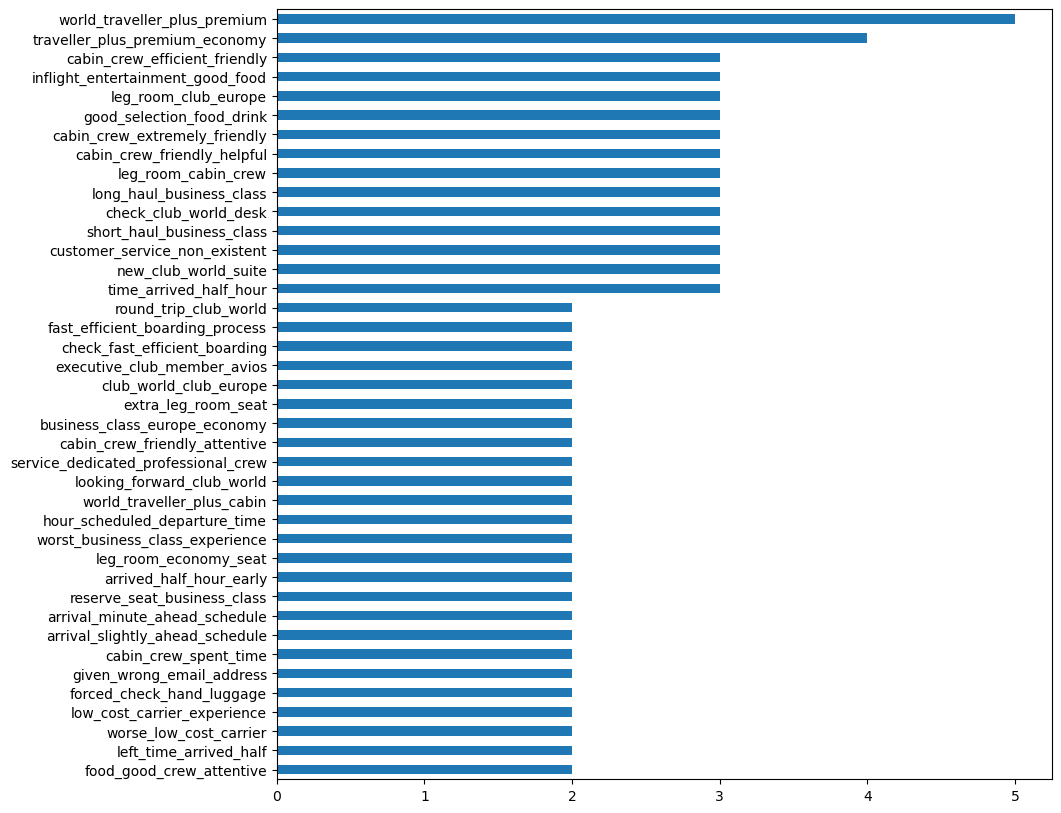

In [34]:
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

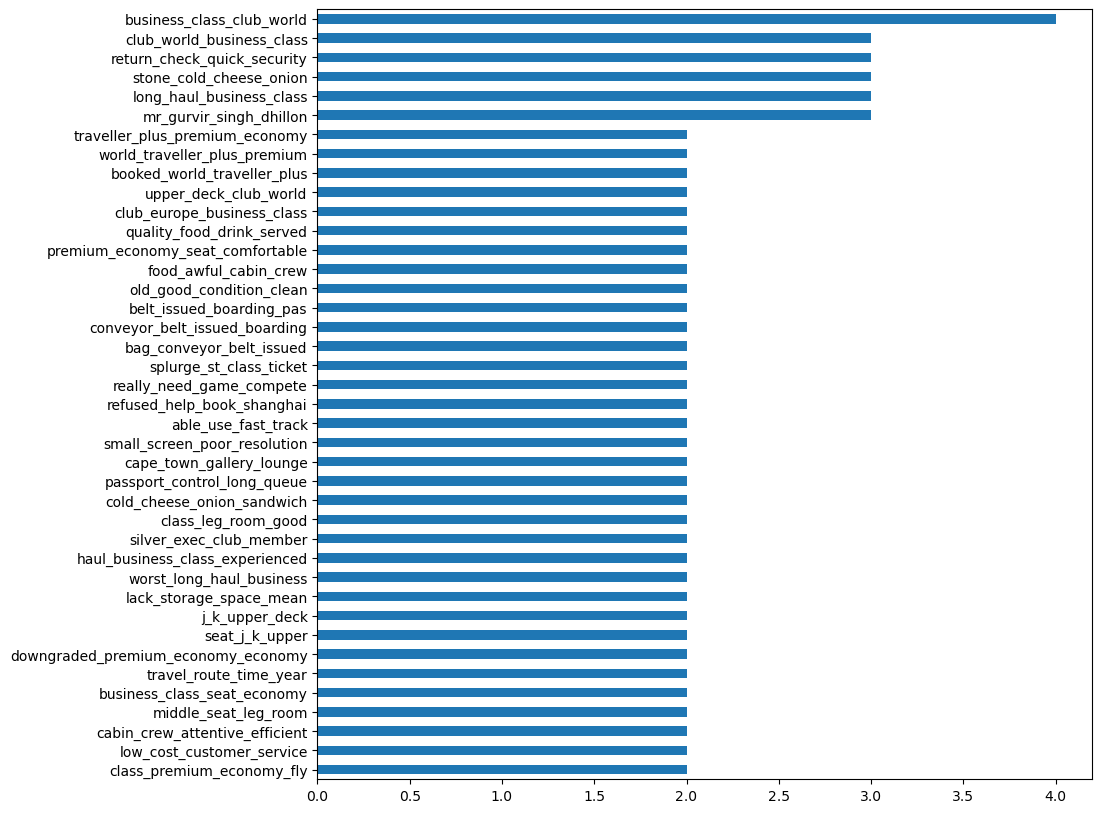

In [35]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

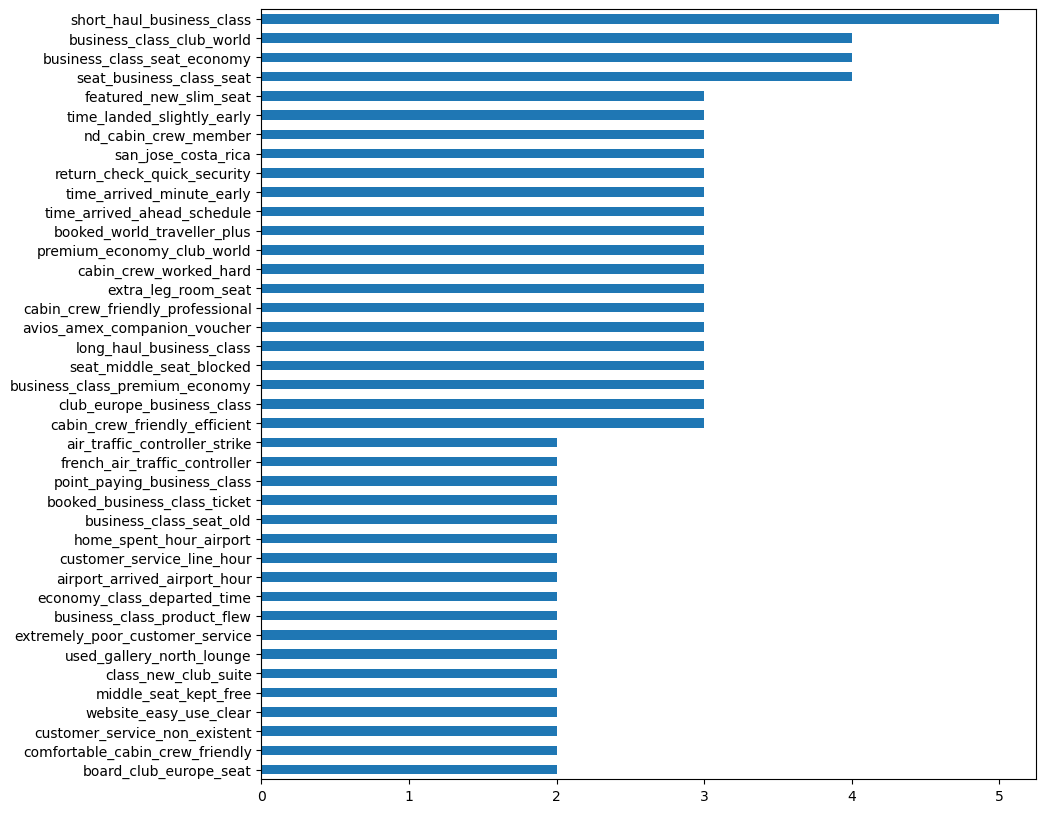

In [36]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [37]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity']=0
for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [38]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

1888 number of reviews between -0.2 and 0.2 polarity score
1096 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [39]:
import nltk

In [40]:
%%capture
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()


df['label']=0

for i in range(len(df.corpus)):
    
    score=vds.polarity_scores(df.corpus[i])['compound']
    if score>0.2:
        df['label'][i]=-1
    elif score<0:
        df['label'][i]=-1
    else:
        df['label'][i]=0

In [41]:
df

Unnamed: 0                                            reviews  stars  \
0              0  ✅ Trip Verified | On the memorable day of Janu...    5.0   
1              1  Not Verified | I did not actually get to fly w...    8.0   
2              3  ✅ Trip Verified |  I flew to LHR from ATH in C...    6.0   
3              4  ✅ Trip Verified |  I like the British Airways ...    9.0   
4              5  ✅ Trip Verified |  I have come to boarding and...    8.0   
...          ...                                                ...    ...   
2768        3495  We flew indirect to Orlando and back - althoug...    9.0   
2769        3496  LHR-PHL on a 787 Dreamliner seat 3K. I recomme...    1.0   
2770        3497  Travelled with BA from Rome to LHR. Staff at R...    8.0   
2771        3498  London to Budapest on Club World-now I don't e...    2.0   
2772        3499  We flew Premium Economy on BA from Boston to L...    8.0   

           date         country  verified  \
0    2024-02-06         Nigeria      True   
1    2024-02-05  United Kingdom     False   
2    2024-01-30           Japan      True   
3    2024-01-29  United Kingdom      True   
4    2024-01-28         Ukraine      True   
...         ...             ...       ...   
2768 2014-09-06  United Kingdom     False   
2769 2014-09-06  United Kingdom     False   
2770 2014-09-06  United Kingdom     False   
2771 2014-09-06       Australia     False   
2772 2014-09-06   United States     False   

                                                 corpus  polarity  label  
0     memorable day january th family embarked journ...  0.208958     -1  
1     verified actually get fly ba cancelled flight ...  0.266667     -1  
2     flew lhr ath club europe ba dec transfer jal f...  0.208333     -1  
3     like british airway world traveller plus produ...  0.151316     -1  
4     come boarding cabin luggage taken plane full a...  0.188095     -1  
...                                                 ...       ...    ...  
2768  flew indirect orlando back although miami orla... -0.043108     -1  
2769  lhr phl dreamliner seat k recommend seat k k g...  0.070742     -1  
2770  avelled ba rome lhr staff rome wonderful contr...  0.066667     -1  
2771  london budapest club world even mention fact l... -0.096622     -1  
2772  flew premium economy ba boston london london j...  0.225000     -1  

[2773 rows x 9 columns]

In [42]:
df.label.value_counts()

label
-1    2678
 0      95
Name: count, dtype: int64

# Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [43]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [48]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics=8

model=LatentDirichletAllocation(n_components=number_of_topics,random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict={}
#loop through modelcomponents

for topic_idx,topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic=pd.DataFrame(topic_dict)

LatentDirichletAllocation(n_components=8, random_state=0)


In [49]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight          1114.4       luggage            46.0           abu   
1          time           494.3        travel            12.1         dhabi   
2          crew           483.8           fee             8.5        screen   
3          good           433.7        charge             8.2       holiday   
4         cabin           387.8      pandemic             7.9         route   
5            ba           362.1           pay             6.5          wife   
6          seat           359.8          made             6.4        mother   
7         staff           335.6       avianca             6.1        broken   
8         check           326.8       company             6.1         would   
9        london           295.0         carry             6.0         asked   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0            16.0        flight           666.1          seat          2239.7   
1            16.0          good           647.6        flight          1768.8   
2            10.1         class           645.4            ba          1354.1   
3             9.2          food           629.2       service           765.5   
4             7.2            ba           575.6       economy           726.0   
5             7.2         first           561.4          food           719.3   
6             6.6       service           526.6         class           675.5   
7             5.6          seat           513.8       airline           672.1   
8             5.4        lounge           492.4         cabin           661.1   
9             5.3          crew           464.4       british           660.7   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight          2171.4            ba           168.1            ba   
1            ba          1001.5        flight           121.9        flight   
2          hour           744.7       service            94.5      customer   
3        airway           632.5          good            85.2       luggage   
4       british           627.2          food            82.6           bag   
5        london           558.9         staff            79.8         staff   
6          told           550.5          crew            77.1       service   
7      customer           539.3          seat            71.1       airline   
8       service           523.6     passenger            67.0        london   
9         would           518.8           lhr            61.2        airway   

  Topic 7 weights  
0           281.4  
1           126.6  
2            68.5  
3            67.7  
4            61.7  
5            58.3  
6            56.2  
7            52.8  
8            50.7  
9            50.0

There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

# Topic modeling with NMF

In [50]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=2,init='random',random_state=0)
nmf.fit_transform(tf)

array([[0.00470941, 0.13678621],
       [0.0033877 , 0.05475779],
       [0.08217666, 0.07720745],
       ...,
       [0.01791282, 0.04364456],
       [0.07875563, 0.00052174],
       [0.0617312 , 0.03726278]])

In [51]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [52]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0          seat            20.0        flight            19.5
1            ba            12.7            ba             5.9
2         class             8.9          hour             4.5
3          food             7.7        airway             3.8
4       service             7.6       british             3.8
5      business             7.0          time             3.6
6         cabin             7.0        london             3.6
7          good             6.8         would             3.0
8          crew             6.6       service             2.8
9       economy             5.8       airline             2.6

With NMF algorithm as well we see there are few words that are not conclusive like "seat". So we will remove such words from the list and try topic modeling again.